In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

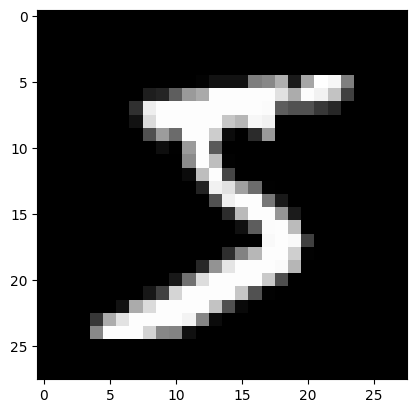

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape


(60000, 10)

SWETHA S, 212222230155


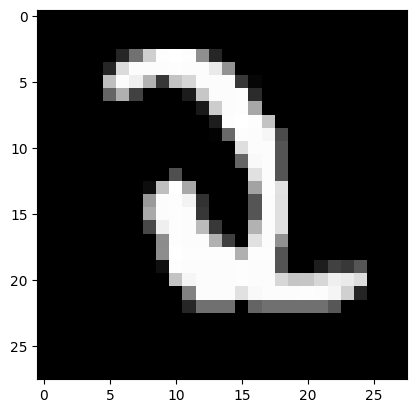

In [17]:
print("SWETHA S, 212222230155")
single_image = X_train[400]
plt.imshow(single_image,cmap='gray')

In [18]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.8378 - loss: 0.5353 - val_accuracy: 0.9735 - val_loss: 0.0881
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.9758 - loss: 0.0834 - val_accuracy: 0.9787 - val_loss: 0.0674
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9840 - loss: 0.0555 - val_accuracy: 0.9835 - val_loss: 0.0482
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9879 - loss: 0.0393 - val_accuracy: 0.9848 - val_loss: 0.0465
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9912 - loss: 0.0299 - val_accuracy: 0.9854 - val_loss: 0.0469


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
print("SWETHA S, 212222230155")
metrics.head()

SWETHA S, 212222230155


,accuracy,loss,val_accuracy,val_loss
0,0.924350,0.255949,0.9735,0.088143
1,0.977083,0.077074,0.9787,0.067443
2,0.983750,0.054679,0.9835,0.048247
3,0.986800,0.042293,0.9848,0.046532
4,0.990183,0.032653,0.9854,0.046927


SWETHA S, 212222230155


<Axes: >

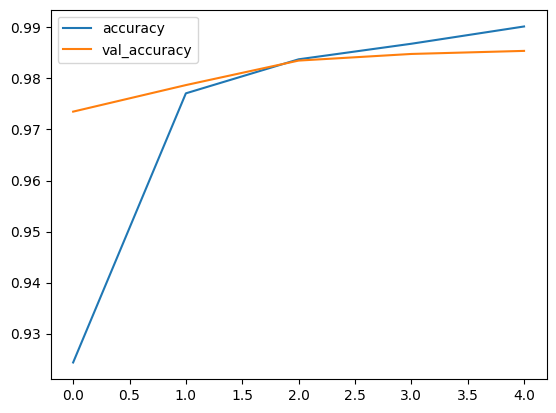

In [27]:
print("SWETHA S, 212222230155")
metrics[['accuracy','val_accuracy']].plot()

SWETHA S, 212222230155


<Axes: >

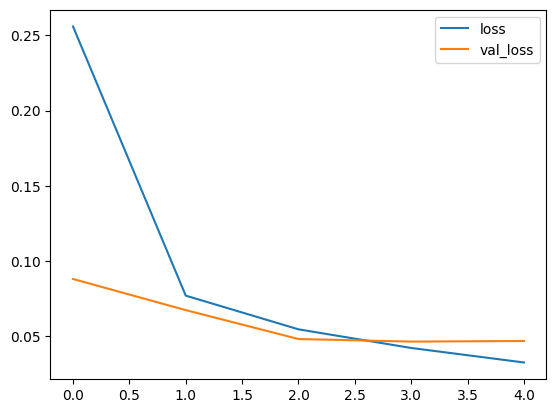

In [28]:
print("SWETHA S, 212222230155")
metrics[['loss','val_loss']].plot()

In [29]:
print("SWETHA S, 212222230155")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

SWETHA S, 212222230155
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [30]:
print("SWETHA S, 212222230155")
print(classification_report(y_test,x_test_predictions))

SWETHA S, 212222230155
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:

print(confusion_matrix(y_test,x_test_predictions))

[[ 973    0    1    1    0    2    0    0    3    0]
 [   0 1129    3    0    0    0    1    1    1    0]
 [   1    2 1018    1    2    0    1    5    2    0]
 [   0    0    1 1003    0    4    0    1    1    0]
 [   1    0    1    0  977    0    1    0    0    2]
 [   1    0    1    7    0  881    1    0    1    0]
 [   7    2    0    1    3    9  933    0    3    0]
 [   1    0    8    2    1    0    0 1015    1    0]
 [   5    0    2    1    0    1    1    2  961    1]
 [   2    3    0    3   16    6    0    7    8  964]]


In [36]:
img = image.load_img('EX3PIC.jpg')

In [35]:
type(img)

img = image.load_img('EX3PIC.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
SWETHA S
[7]


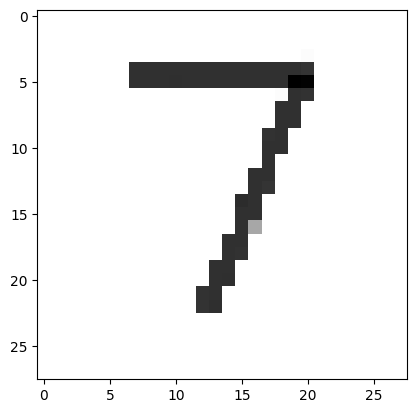

In [37]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

print(x_single_prediction)

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

print('SWETHA S')
print(x_single_prediction)